In [124]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('data_ira/train_mixtralF_jv.csv')
len(df)

3554

In [125]:
# 1. Remove duplicates
df.drop_duplicates(inplace=True)
len(df)

3486

In [126]:
# Function to split premise into kalimat-1, kalimat-2, kalimat-3, kalimat-4
def split_premise(premise):
    if isinstance(premise, str):  # Ensure premise is a string
        # Split based on the period (.)
        sentences = premise.split('.')
        
        # Remove empty sentences or whitespace-only sentences
        sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

        # If there are less than 4 sentences, pad with empty strings
        while len(sentences) < 4:
            sentences.append('')

        # Return the first four sentences
        return sentences[:4]
    else:
        # Return empty values if premise is not a valid string
        return ['', '', '', '']

# 2. Apply split function to premise and create new columns for kalimat-1 to kalimat-4
df[['kalimat_1', 'kalimat_2', 'kalimat_3', 'kalimat_4']] = df['premise'].apply(split_premise).apply(pd.Series)

df.head(2)

,topic,premise,correct_ending,incorrect_ending,kalimat_1,kalimat_2,kalimat_3,kalimat_4
0,Food,Ejoy punika ngligik soko bakar. Ejoy wis dados...,NaN,Ejoy nelelepat kuburan saking ngendi soko bakar.,Ejoy punika ngligik soko bakar,Ejoy wis dados dheweke kuliner pinter,Soko bakar wis dados kuburan,Ejoy wongkekake kula soko bakar
1,Food,Kang Narti wong saking wilujengan. Kang Narti ...,"Ejoy arep dados soko bakar, karepke kaget kubu...","Kakek wis ngrasakake kang Narti, karepke wis k...",Kang Narti wong saking wilujengan,Kang Narti pinter ngligik jajan pasar,"Jajan wis dados kosong, wong kena mboten makan",Kang Narti wis dados jajan kakeknya


In [127]:
len(df)

3486

In [128]:
# Filter rows where any of the sentence columns have empty string values
empty_sentences_df = df[(df['kalimat_1'] == '') | 
                        (df['kalimat_2'] == '') | 
                        (df['kalimat_3'] == '') | 
                        (df['kalimat_4'] == '')]

# Display the filtered rows
display(empty_sentences_df[:3])
len(empty_sentences_df)

,topic,premise,correct_ending,incorrect_ending,kalimat_1,kalimat_2,kalimat_3,kalimat_4
3,Food,Sari ingkang kulineran sampe ngligro kota. Ngl...,NaN,Sari tetep gali duit ora bisa kulineran kowe.,Sari ingkang kulineran sampe ngligro kota,Ngligro saking harga mahal sing matengan,"Sari kira-kira, ""Siapa kowani ora bisa nggolen...",
5,Food,Prabowo kulineran sampe ngalamun teman. Teman ...,"Budi kena tau, warung iki nggawe karepasehannya.",Prabowo lelaki bajingan.,Prabowo kulineran sampe ngalamun teman,Teman iki kulineran sampe gagal,"Prabowo kira-kira, ""Ambek, kowe ora bisa makan...",
12,Food,"Usup mau mencoba masak gudeg, hidangan tradisi...",Ibu Narti mencapai taksu membuat ragout buah p...,Usup hilang semangat dan menyerah mencoba mema...,"Usup mau mencoba masak gudeg, hidangan tradisi...",Usup berkunjung ke warung gudeg dan membeli ba...,Usup berusaha mengikuti langkah-langkah memasa...,


886

In [129]:
# 4. Remove rows where any of the kalimat columns are empty strings
df = df[(df['kalimat_1'] != '') & 
        (df['kalimat_2'] != '') & 
        (df['kalimat_3'] != '') & 
        (df['kalimat_4'] != '')]

len(df)

2600

In [130]:
# Function to check if an ending has more than one sentence
def is_single_sentence(ending):
    if pd.isna(ending):  # Check if the ending is NaN
        return False
    sentences = ending.split('.')
    # Strip whitespace and filter out empty sentences
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    return len(sentences) == 1

# 5. Remove rows where correct_ending is None or has more than one sentence
df = df[df['correct_ending'].apply(lambda x: is_single_sentence(x))]

# 6. Remove rows where incorrect_ending is None or has more than one sentence
df = df[df['incorrect_ending'].apply(lambda x: is_single_sentence(x))]

len(df)

1861

In [131]:
# 5. Drop the original 'premise' column as it's no longer needed
df.drop(columns=['premise'], inplace=True)

In [132]:
df.head(3)

,topic,correct_ending,incorrect_ending,kalimat_1,kalimat_2,kalimat_3,kalimat_4
1,Food,"Ejoy arep dados soko bakar, karepke kaget kubu...","Kakek wis ngrasakake kang Narti, karepke wis k...",Kang Narti wong saking wilujengan,Kang Narti pinter ngligik jajan pasar,"Jajan wis dados kosong, wong kena mboten makan",Kang Narti wis dados jajan kakeknya
2,Food,"Kang Narti ngasih jajan kakek, karepke kakek w...","Elistin kula kuping sapi wirasan, wong wis kul...",Elistin ngligik nasi jagung lawas,Elistin wong saking kaswin,Nasi jagung wis dados kuping sapi,"Elistin kula kuping sapi wis dados, nanging wo..."
4,Food,Sari nikadi ngligro kulineran nggono.,Budi nggawe warung iki.,Budi kulineran sampe warung tegalan,Iki warung ngligro sing paling enak,"Budi kena tau, warung kowani ora ada stok nasi",Budi marah nanging tetep kena nungsi


In [133]:
df.to_csv('cleaned_train_mixtralF_jv.csv', index=False, columns=['topic', 'kalimat_1', 'kalimat_2', 'kalimat_3', 'kalimat_4', 'correct_ending', 'incorrect_ending'])

In [153]:
def balancing(df, max_rows=1000, rows_per_topic=None):
    """
    Balance the DataFrame by topic and save to a new CSV file.

    Parameters:
    - df: The DataFrame to be balanced.
    - file_path: Path to save the balanced DataFrame.
    - max_rows: Maximum number of rows for the balanced DataFrame.
    - rows_per_topic: Number of rows per topic. If None, calculated based on max_rows.

    Returns:
    - balanced_df: The balanced DataFrame.
    """
    unique_topics = df['topic'].unique()
    if rows_per_topic is None:
        rows_per_topic = max_rows // len(unique_topics)  # Adjust this as needed

    # Create a balanced DataFrame
    balanced_df = pd.DataFrame(columns=df.columns)
    remaining_rows_needed = max_rows

    # Dictionary to track the number of rows sampled from each topic
    sampled_counts = {}

    for topic in unique_topics:
        # Filter rows for the current topic
        subset = df[df['topic'] == topic]

        # Sample rows to balance the data
        sampled_subset = subset.sample(
            min(len(subset), rows_per_topic),
            random_state=42
        )

        # Update the sampled counts
        sampled_counts[topic] = len(sampled_subset)

        # Append the sampled subset to the balanced DataFrame
        balanced_df = pd.concat([balanced_df, sampled_subset], ignore_index=True)

        # Decrease the number of remaining rows needed
        remaining_rows_needed -= len(sampled_subset)

    # If we still need more rows, add them from the remaining available rows
    if remaining_rows_needed > 0:
        # Sort topics by the number of available rows in descending order
        topic_counts = df['topic'].value_counts()
        for topic in topic_counts.index:
            if remaining_rows_needed <= 0:
                break

            # Filter rows for the current topic
            subset = df[df['topic'] == topic]

            # Calculate the number of additional rows to sample
            additional_rows = min(remaining_rows_needed, len(subset) - sampled_counts.get(topic, 0))

            if additional_rows > 0:
                sampled_subset = subset.sample(
                    additional_rows,
                    random_state=42
                )

                # Append the additional sampled rows to the balanced DataFrame
                balanced_df = pd.concat([balanced_df, sampled_subset], ignore_index=True)

                # Update the remaining rows needed
                remaining_rows_needed -= additional_rows

    # Ensure that the balanced DataFrame has exactly max_rows
    balanced_df = balanced_df.sample(n=max_rows, random_state=42)
    return balanced_df

In [154]:
df_claude = pd.read_csv('data_ira/cleaned_train_claude_jv.csv')
print(len(df_claude))

display(df_claude.groupby(['topic']).size().reset_index(name='counts'))

balancing_claude = balancing(df_claude)
display(balancing_claude.groupby(['topic']).size().reset_index(name='counts'))

2050


,topic,counts
0,Agriculture,166
1,Art,172
2,Daily Activities,182
3,Death,173
4,Family Relationship,165
5,Fishers and Trade,160
6,Food,172
7,Pregnancy and Kids,166
8,Religious Holiday,178
9,Socio-religious,181


,topic,counts
0,Agriculture,83
1,Art,83
2,Daily Activities,87
3,Death,83
4,Family Relationship,83
5,Fishers and Trade,83
6,Food,83
7,Pregnancy and Kids,83
8,Religious Holiday,83
9,Socio-religious,83


In [155]:
df_gemma = pd.read_csv('data_ira/cleaned_train_gemmaF_jv.csv')
print(len(df_gemma))

display(df_gemma.groupby(['topic']).size().reset_index(name='counts'))

balancing_gemma = balancing(df_gemma)
display(balancing_gemma.groupby(['topic']).size().reset_index(name='counts'))

3814


,topic,counts
0,Agriculture,315
1,Art,322
2,Daily Activities,313
3,Death,319
4,Family Relationship,329
5,Fishers and Trade,308
6,Food,328
7,Pregnancy and Kids,314
8,Religious Holiday,284
9,Socio-religious,348


,topic,counts
0,Agriculture,83
1,Art,83
2,Daily Activities,83
3,Death,83
4,Family Relationship,83
5,Fishers and Trade,83
6,Food,83
7,Pregnancy and Kids,83
8,Religious Holiday,83
9,Socio-religious,87


In [156]:
df_mixtral = pd.read_csv('data_ira/cleaned_train_mixtralF_jv.csv')
print(len(df_mixtral))

display(df_mixtral.groupby(['topic']).size().reset_index(name='counts'))

balancing_mixtral = balancing(df_mixtral)
display(balancing_mixtral.groupby(['topic']).size().reset_index(name='counts'))

1861


,topic,counts
0,Agriculture,136
1,Art,176
2,Daily Activities,186
3,Death,146
4,Family Relationship,158
5,Fishers and Trade,129
6,Food,178
7,Pregnancy and Kids,149
8,Religious Holiday,160
9,Socio-religious,149


,topic,counts
0,Agriculture,83
1,Art,83
2,Daily Activities,87
3,Death,83
4,Family Relationship,83
5,Fishers and Trade,83
6,Food,83
7,Pregnancy and Kids,83
8,Religious Holiday,83
9,Socio-religious,83


In [157]:
df_cohere = pd.read_csv('data_ira/cleaned_train_cohere_jv.csv')
print(len(df_cohere))

display(df_cohere.groupby(['topic']).size().reset_index(name='counts'))

balancing_cohere = balancing(df_cohere)
display(balancing_cohere.groupby(['topic']).size().reset_index(name='counts'))

1039


,topic,counts
0,Agriculture,83
1,Art,88
2,Daily Activities,90
3,Death,81
4,Family Relationship,83
5,Fishers and Trade,84
6,Food,86
7,Pregnancy and Kids,86
8,Religious Holiday,90
9,Socio-religious,89


,topic,counts
0,Agriculture,83
1,Art,83
2,Daily Activities,83
3,Death,81
4,Family Relationship,83
5,Fishers and Trade,83
6,Food,83
7,Pregnancy and Kids,83
8,Religious Holiday,89
9,Socio-religious,83


In [158]:
df_llama = pd.read_csv('data_ira/cleaned_train_llama_jv.csv')
print(len(df_llama))

display(df_llama.groupby(['topic']).size().reset_index(name='counts'))

balancing_llama = balancing(df_llama)
display(balancing_llama.groupby(['topic']).size().reset_index(name='counts'))

1636


,topic,counts
0,Agriculture,95
1,Art,154
2,Daily Activities,173
3,Death,122
4,Family Relationship,166
5,Fishers and Trade,110
6,Food,119
7,Pregnancy and Kids,169
8,Religious Holiday,128
9,Socio-religious,161


,topic,counts
0,Agriculture,83
1,Art,83
2,Daily Activities,87
3,Death,83
4,Family Relationship,83
5,Fishers and Trade,83
6,Food,83
7,Pregnancy and Kids,83
8,Religious Holiday,83
9,Socio-religious,83


In [159]:
df_gpt4o = pd.read_csv('data_ira/cleaned_train_gpt4o_jv.csv')
print(len(df_gpt4o))

display(df_gpt4o.groupby(['topic']).size().reset_index(name='counts'))

balancing_gpt4o = balancing(df_gpt4o)
display(balancing_gpt4o.groupby(['topic']).size().reset_index(name='counts'))

5892


,topic,counts
0,Agriculture,473
1,Art,503
2,Daily Activities,496
3,Death,480
4,Family Relationship,492
5,Fishers and Trade,468
6,Food,495
7,Pregnancy and Kids,500
8,Religious Holiday,505
9,Socio-religious,503


,topic,counts
0,Agriculture,83
1,Art,83
2,Daily Activities,83
3,Death,83
4,Family Relationship,83
5,Fishers and Trade,83
6,Food,83
7,Pregnancy and Kids,83
8,Religious Holiday,87
9,Socio-religious,83


For Agriculture:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Art:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Daily Activities:
Claude: 87
Cohere: 83
GPT-4o: 83
Mixtral: 87
Llama: 87
Gemma: 83

For Death:
Claude: 83
Cohere: 81
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Family Relationship:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Fishers and Trade:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Food:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Pregnancy and Kids:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Religious Holiday:
Claude: 83
Cohere: 89
GPT-4o: 87
Mixtral: 83
Llama: 83
Gemma: 83

For Socio-religious:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 87

For Traditional Games:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Wedding:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 8

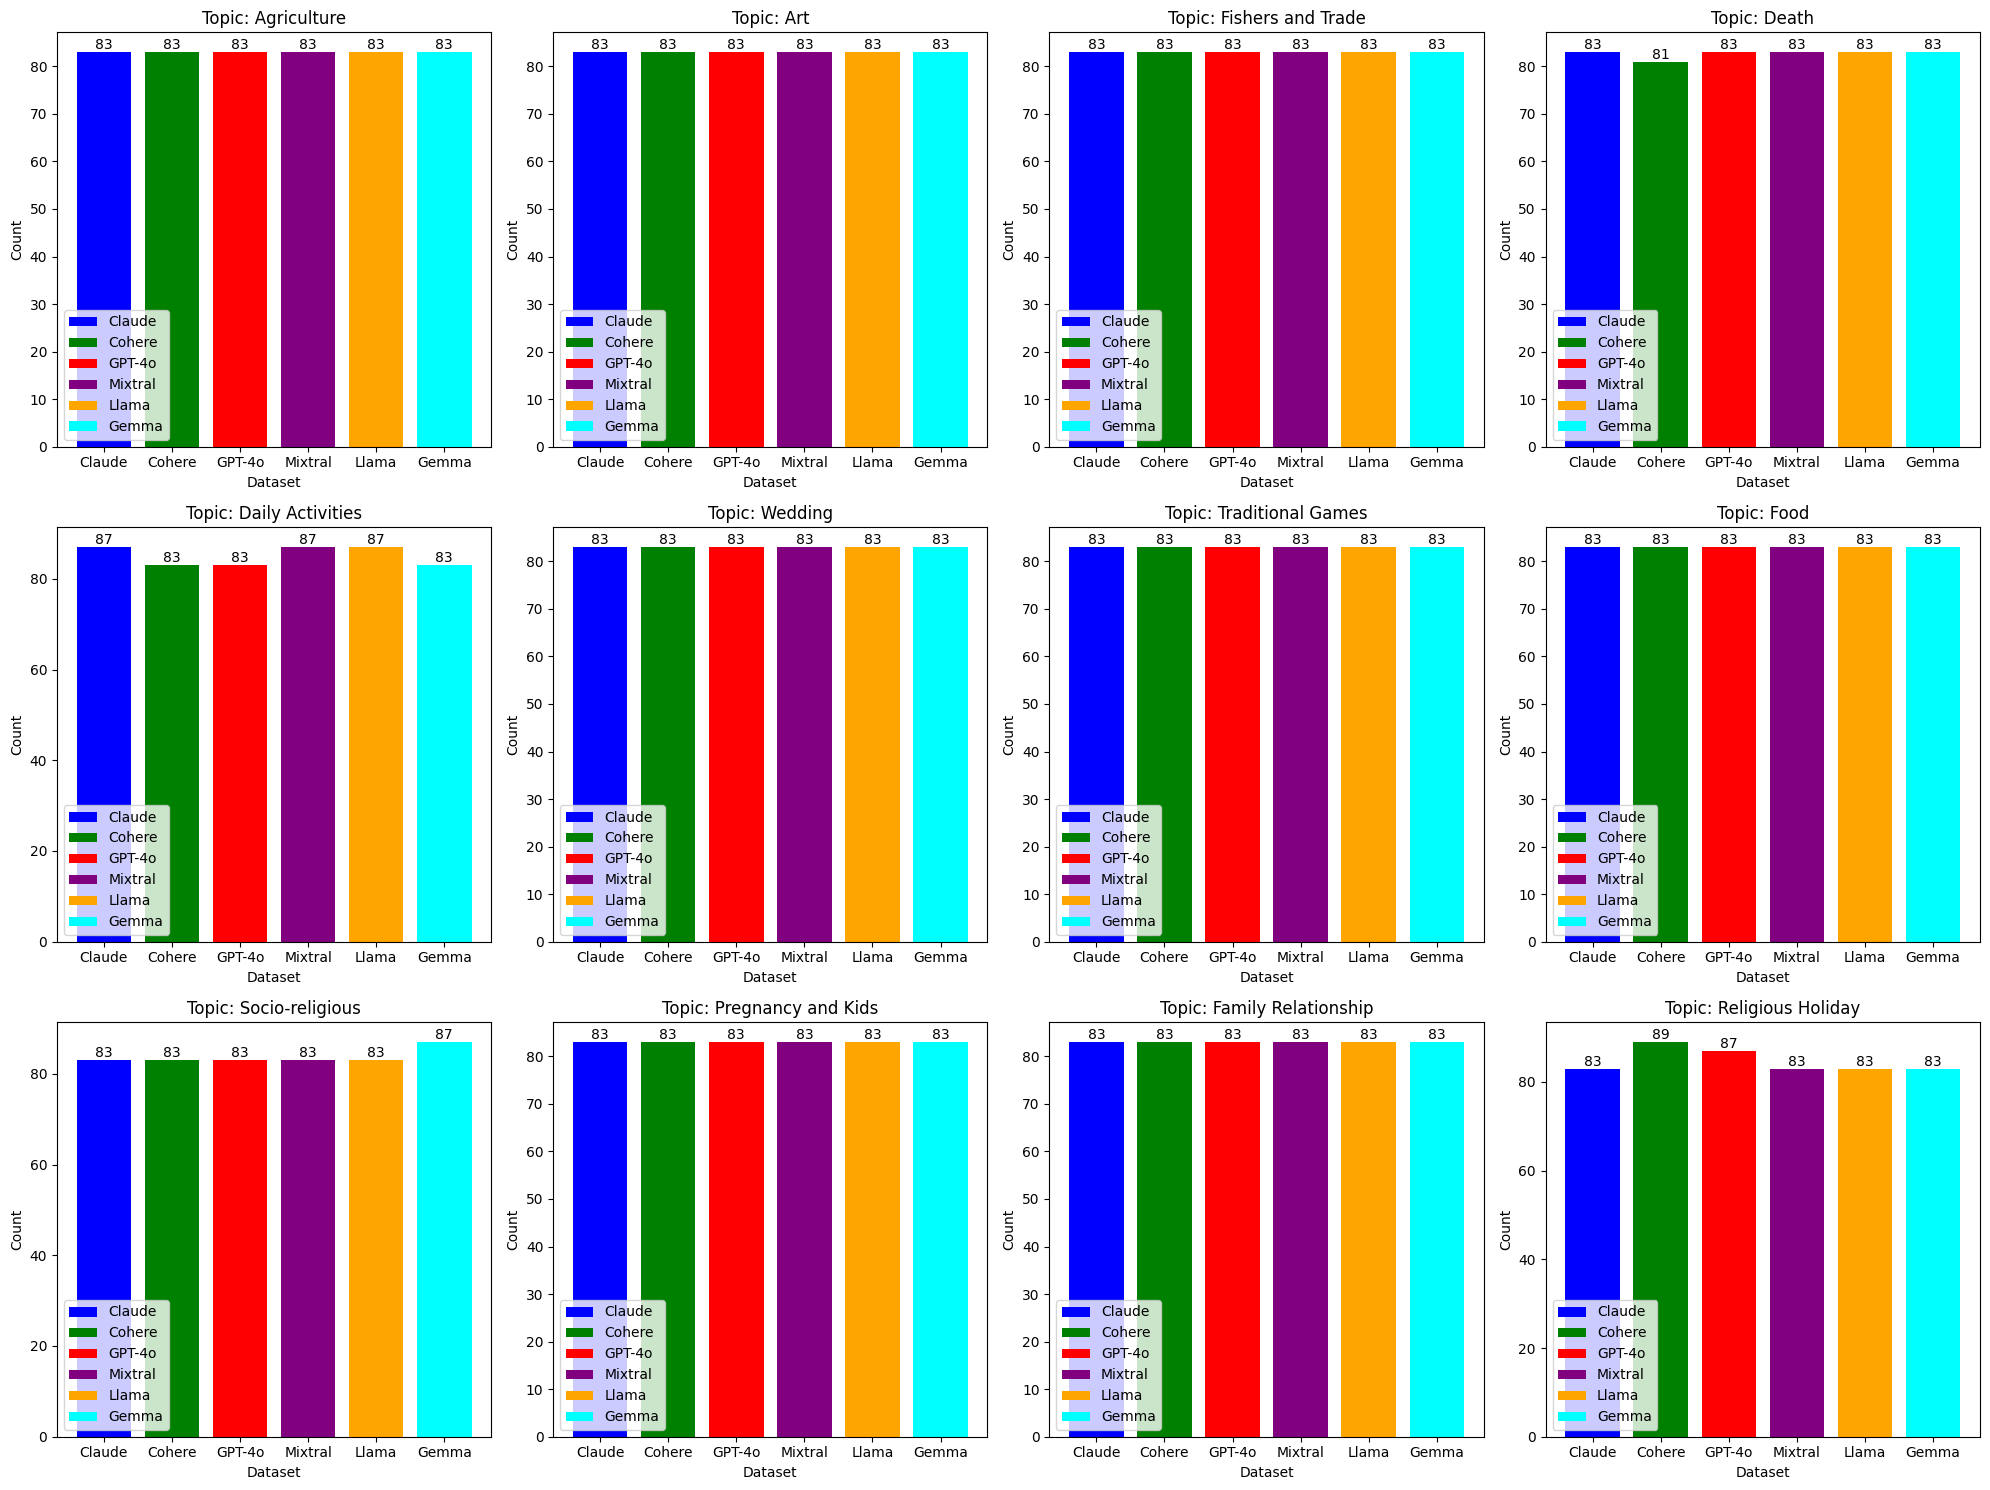

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your DataFrames
dataframes = {
    'Claude': balancing_claude,
    'Cohere': balancing_cohere,
    'GPT-4o': balancing_gpt4o,
    'Mixtral': balancing_mixtral,
    'Llama': balancing_llama,
    'Gemma': balancing_gemma
}

# Combine topic counts for all DataFrames
all_topics = set()

# Collect all unique topics across DataFrames
for df_ in dataframes.values():
    all_topics.update(df_['topic'].unique())

# Print counts for each topic
for topic in sorted(all_topics):
    print(f"For {topic}:")
    for label, df_ in dataframes.items():
        count = df_[df_['topic'] == topic].shape[0]
        print(f"{label}: {count}")
    print()

# Set up the figure and axes
fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # Adjust figure size as needed
axs = axs.flatten()  # Flatten the 2D array of axes to make it easier to iterate

# Colors for each DataFrame
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Plot each topic in separate subplots
for i, topic in enumerate(df['topic'].unique()):
    for j, (label, df_) in enumerate(dataframes.items()):
        topic_counts = df_[df_['topic'] == topic].shape[0]
        bars = axs[i].bar(label, topic_counts, color=colors[j], label=label)
        
        # Annotate the bar with the count
        for bar in bars:
            yval = bar.get_height()
            axs[i].text(
                bar.get_x() + bar.get_width() / 2, 
                yval, 
                int(yval), 
                ha='center', 
                va='bottom'
            )

    axs[i].set_title(f'Topic: {topic}')
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel('Dataset')
    axs[i].legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()

In [170]:
# Save each DataFrame to a CSV file
for name, df in dataframes.items():
    file_path = f'data_ira/balanced_{name}.csv'
    df.to_csv(file_path, index=False)
    print(f"Saved {name} DataFrame to {file_path}")

Saved Claude DataFrame to data_ira/balanced_Claude.csv
Saved Cohere DataFrame to data_ira/balanced_Cohere.csv
Saved GPT-4o DataFrame to data_ira/balanced_GPT-4o.csv
Saved Mixtral DataFrame to data_ira/balanced_Mixtral.csv
Saved Llama DataFrame to data_ira/balanced_Llama.csv
Saved Gemma DataFrame to data_ira/balanced_Gemma.csv
